# 2.1
## AlexNet
- 8개의 층으로 이루어져있다.(5개의 컨볼루션 3개의 FC)
- pooling은 cnn을 통해 얻은 feature map의 크기를 줄이기 위한 용도이고,
- 연산은 총 3군데서 공유한다. (layer 2,4,5)
- 두개의 GPU로 학습이 이루어지고 윗부분과 아래부분이 서로 다른 GPU사용하며 연산을 공유한다.

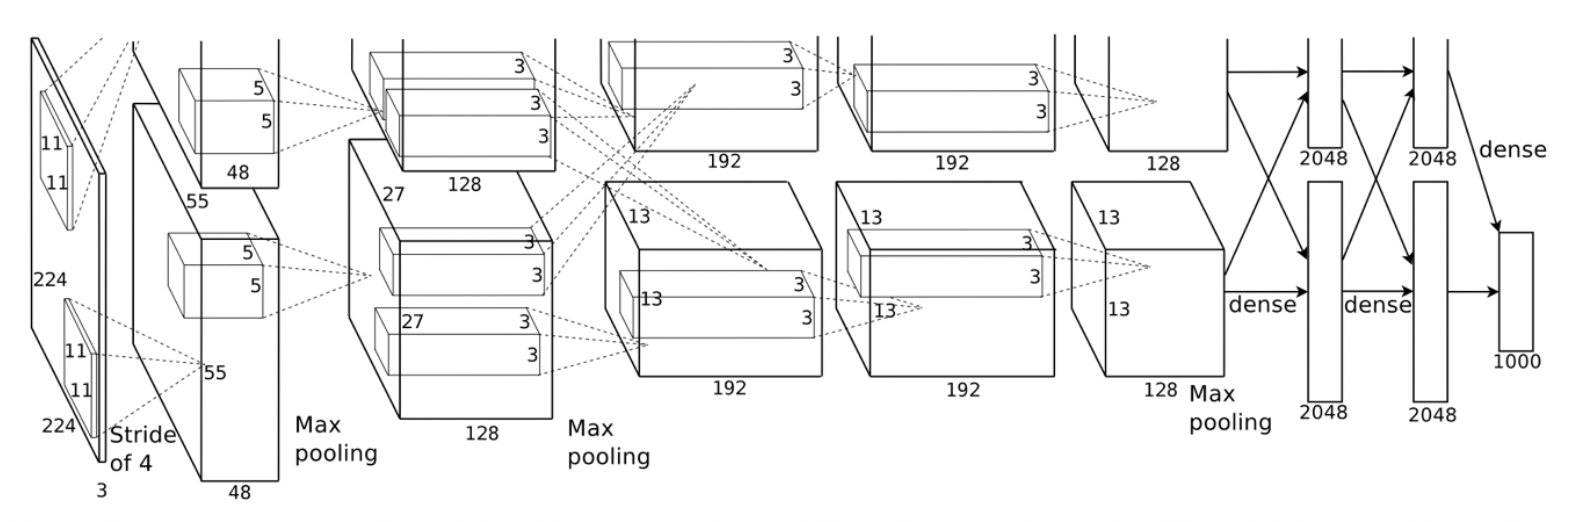


In [9]:
import torch
from torchvision import models
alexnet=models.AlexNet()

이런식으로 객체를 생성해 훈련시키면 된다. 

## ResNet

residual learning을 사용한 네트워크로 깊은 신경망을 안정적으로 훈련가능하게 해준다.
이를 이용해 계층수를 매우갚게 컨볼루션 신경망을 쌓을 수 있다.

함수를 취한값뿐 아니라 현재 값을 함께 더해주는 방식이다.
vanishing gradient문제 해결을 위해 f(x)+x를 더해준다면 만약 미분시 f'(x)+1이 되었을때 f'(x)값이 0이 되어도 적어도 1은 더해지기 때문이다.

In [10]:
#이미지넷으로 pretrained된 파라미터들을 모두 받아온 resnet101구현.
resnet=models.resnet101(pretrained=True)

In [11]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Residual vs Bottlenect resiual

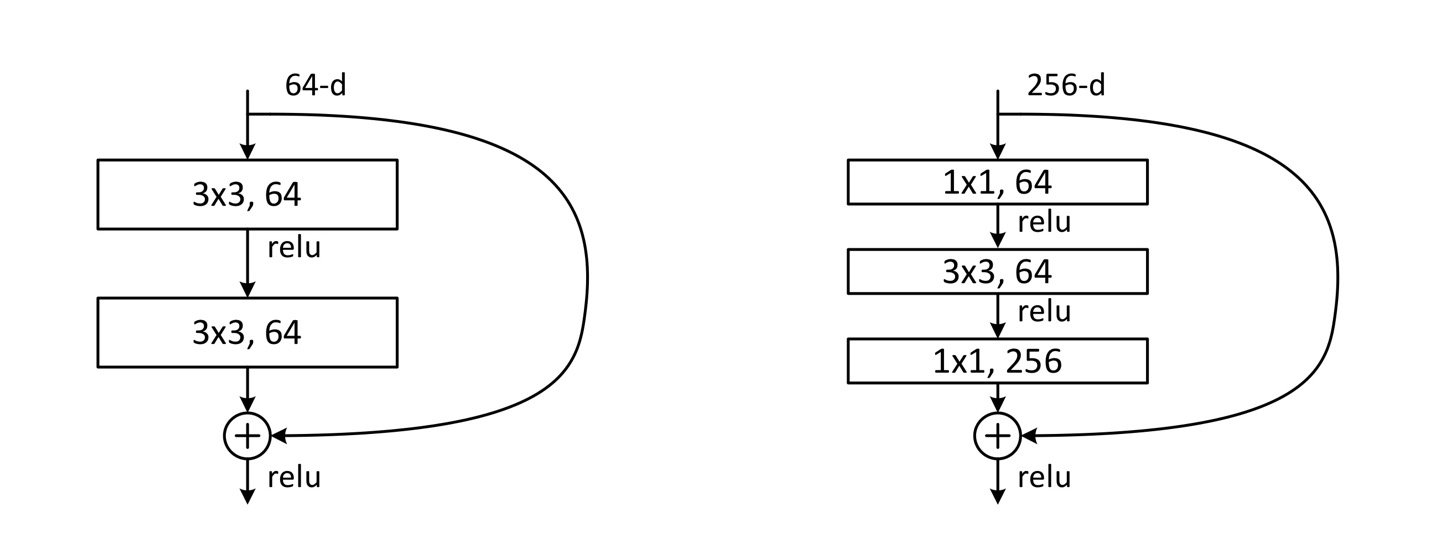

1x1, 64: 1x1 convolution layer통해 차원축소

3x3 ,64: 3x3 convolution 연산

1x1, 256: 1x1 convolution layer통해 차원다시 키워줌

3x3연산 수행 전 1x1하면 feature map 개수도 줄고 다음연산 수행시 연산수 많이 줄어든다.

resnet 변수는 함수처럼 사용가능하고 하나이상의 이미지를 받아 1000개의 클래스별 점수를 반환.

In [12]:
#이미지들이 동일한 숫자 범위안에 색상값이 들어오게 전처리가 필요
from torchvision import transforms
#크기변경, 중앙배치, 정규화 
preprocess=transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.485,0.485],
        std=[0.229,0.229,0.229]
    )
])

In [15]:
from PIL import Image
img=Image.open('bobby.jpg')
img_t=preprocess(img)
batch_t=torch.unsqueeze(img_t,0)

In [16]:
#inference: 훈련된 모델에 데이터를 넣어 결과를 보는 과정
resnet.eval() #추론을 수행하려면 eval모드로 설정

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
out=resnet(batch_t)
out
#클래스별 스코어들로 나온다. 제일 높을 클래스의 레이블을 찾으면 된다.

tensor([[-3.4663e+00, -1.5770e+00, -2.3631e+00, -3.2043e+00, -3.2132e+00,
         -1.3830e+00, -2.0880e+00, -2.4788e+00, -1.4659e+00, -2.8943e+00,
         -1.9235e+00, -1.6470e+00, -2.8663e+00, -3.1541e+00, -2.7339e+00,
         -2.8489e+00, -3.4428e+00, -1.0878e+00, -9.4946e-01, -1.3850e+00,
         -3.1537e+00, -3.9182e+00, -2.4473e+00, -1.2367e+00, -1.1828e+00,
         -1.1251e+00, -3.0847e+00, -2.4435e+00, -2.2052e+00, -3.0880e+00,
         -3.3911e+00, -1.8313e+00, -2.1009e+00, -2.1814e+00, -1.9389e+00,
         -3.4359e+00, -1.2554e+00, -1.2882e+00, -1.3880e+00, -1.0728e+00,
         -4.3438e-01, -1.7633e+00,  1.1936e+00, -1.6084e-02, -1.8401e+00,
         -1.5352e+00,  8.3396e-01, -1.2269e+00, -2.9924e+00, -2.9252e+00,
         -2.7394e+00, -1.9613e+00, -1.9128e+00, -2.0633e+00, -1.9315e+00,
         -1.5289e+00, -7.2912e-01, -2.4365e+00, -3.4306e+00, -6.2396e-01,
         -5.8959e-01, -1.1718e+00, -8.9429e-01, -1.5611e+00, -1.5552e+00,
         -2.2987e+00, -1.8811e+00, -6.

In [18]:
with open('class.txt') as f:
  labels=[line.strip() for line in f.readlines()]

In [20]:
torch.max(out,1)

torch.return_types.max(
values=tensor([15.3897], grad_fn=<MaxBackward0>),
indices=tensor([207]))

In [21]:
_,index=torch.max(out,1)

In [28]:
#softmax함수 이용해 확률값으로 나오게 하기
percentage=torch.nn.functional.softmax(out,dim=1)[0]*100
labels[index[0]],percentage[index[0]].item()

('golden retriever', 95.60652160644531)

In [30]:
_,indices=torch.sort(out,descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 95.60652160644531),
 ('Labrador retriever', 3.16536021232605),
 ('cocker spaniel, English cocker spaniel, cocker', 0.351470947265625),
 ('redbone', 0.3076077103614807),
 ('tennis ball', 0.17498250305652618)]

# 2.2

## GAN

- 생성자 : 식별자로 받은 정보를 통해 식별자가 진짜와 가짜이미지를 구분하지 못하게 이미지 생성
- 식별자 : 진짜그림과 가짜그림을 구분

## CycleGAN

한 도메인에 대한 이미지를 다른 도메인으로 바꿔준다.
한 도메인으로부터 다른 도메인으로 바꾼 이미지가 진짜인지 아닌지 판별하기 위해 식별자가 2개 필요. 순방향과 역방향.

In [32]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [33]:
netG=ResNetGenerator() #내부 가중치는 랜덤

In [45]:
model_data=torch.load('horse2zebra_0.4.0.pth')
netG.load_state_dict(model_data)#학습시킨 파라미터들 적용
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

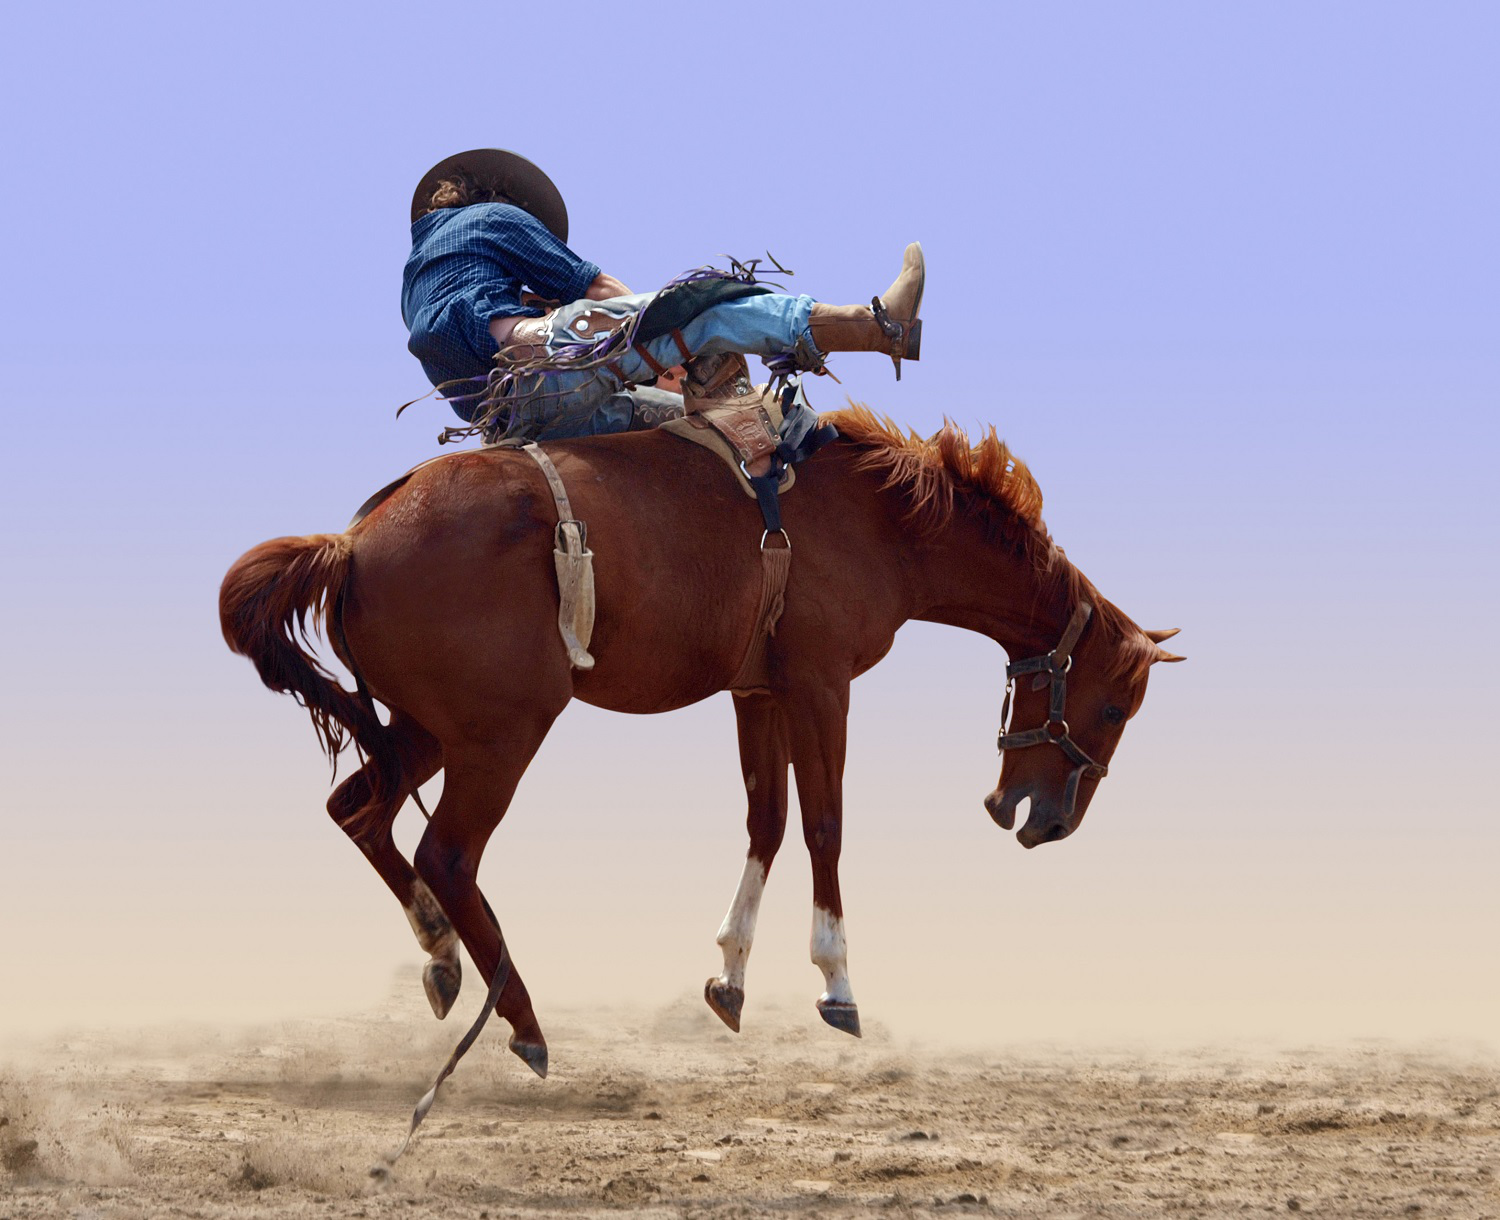

In [49]:
preprocess=transforms.Compose([transforms.Resize(256),
                               transforms.ToTensor()])
img=Image.open('horse.jpg')
img_t=preprocess(img)
batch_t=torch.unsqueeze(img_t,0)
batch_out=netG(batch_t) #3채널로 픽셀값있는 상태
img

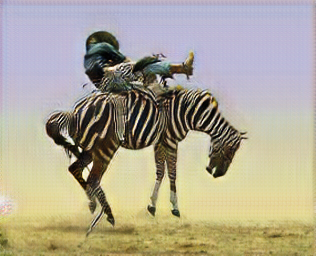

In [50]:
#이미지로 변환할차례
out_t=(batch_out.data.squeeze()+1.0)/2.0
out_img=transforms.ToPILImage()(out_t)
out_img